# R 프로그래밍

> "작성 완료"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [R]

참고: R 프로그래밍 - 허명회 지음

`-` R 프로그래밍에 대해 복습할 겸 간단히 정리

# 벡터(vector)
`-` 데이터 컨테이너의 기본형

## 벡터

In [1]:
x <- 1
is.vector(x)

[1] TRUE

`-` x는 `길이가 1인 벡터 = 스칼라`

In [2]:
print(pi)
print(pi, 16)

[1] 3.141593
[1] 3.141592653589793


`-` π는 숫자가 예약되어 있는 스칼라

In [3]:
M <- matrix(1:12, nrow = 4, ncol = 3, byrow = T)
M

1,2,3
4,5,6
7,8,9
10,11,12


`-` M은 행렬 ---> 벡터의 2차원 배열

## 인덱싱 

In [4]:
f <- c(1, 1, 2, 3, 5, 8, 13, 21)
f[5]

[1] 5

In [5]:
f[1:5]

[1] 1 1 2 3 5

In [6]:
f[-c(1,4)] ## -기호는 제외한다는 의미를 가짐

[1]  1  2  5  8 13 21

In [7]:
f[c(1,2,4)]

[1] 1 1 3

## seq와 rep 함수
`-` `seq(a, b, by = c)`는 a부터 b까지 c간격으로 등차수열 생성

In [8]:
seq(0, 10, 2.5)

[1]  0.0  2.5  5.0  7.5 10.0

`-`  `seq(a, b, length = n)`는 a부터 b까지 길이가 n인 일정 간격 수열을 생성

In [9]:
seq(0, 10, length = 11)

[1]  0  1  2  3  4  5  6  7  8  9 10

`-` `rep(x, times = k)`는 x의 각 요소가 k의 각 요소씩 반복된 벡터

In [10]:
rep(NA, 5)

[1] NA NA NA NA NA

In [11]:
rep(c(1, 2), 3)

[1] 1 2 1 2 1 2

In [12]:
rep(c(1, 2, 3), c(3, 2, 1))

[1] 1 1 1 2 2 3

`-` `rep(x, each = k)`는 x의 각 요소가 각각 k번 반복된 벡터

In [13]:
rep(c(1, 2), each = 3)

[1] 1 1 1 2 2 2

## 필터링 
`-` 조건에 부합하는 데이터 값만 추출

In [14]:
x <- 1:10
x[x %% 2 == 1]

[1] 1 3 5 7 9

In [15]:
subset(x, x %% 2 == 0)

[1]  2  4  6  8 10

## ifelse 함수 
`-` `ifelse(x, yes, no)`는 x가 TRUE이면 yes를 값으로 하고 FALSE이면 no를 값으로 배출

In [16]:
x <- 1:10
x1 <- ifelse(x %% 2 == 0, x, 2*x)
cbind(x, x1)

x,x1
1,2
2,2
3,6
4,4
5,10
6,6
7,14
8,8
9,18
10,10


## names 함수 
`-` `names(x)`는 벡터x의 개별 요소에 이름을 부여함

In [17]:
era <- c(5, 4 ,3, 4 ,5, 6)
era

[1] 5 4 3 4 5 6

`-` paste()함수는 2개의 문자열 벡터를 sep인수로 붙인다

In [18]:
names(era) <- paste("y", 2001:2006, sep = "-")
era

y-2001 y-2002 y-2003 y-2004 y-2005 y-2006 
     5      4      3      4      5      6

# 행렬(matrix) 

`-` $p$개의 길이 $n$인 벡터를 열에 배치함

## 행렬 

In [19]:
n <- 100
p <- 3
x <- rnorm(n*p)
A <- matrix(x, nrow = n, ncol = p)
A[1:6, ]

0.3985257,0.28159071,2.3264862
1.4299784,-0.60442200,-1.1111043
0.2929706,-0.04351824,1.0262398
0.9128263,0.37584395,1.2865189
-0.2134398,0.99927429,0.1097158
0.3423550,-1.62561727,0.8711550


`-` [행, 열] 순으로 인덱싱

In [20]:
A[1:6, 1:2]

0.3985257,0.28159071
1.4299784,-0.60442200
0.2929706,-0.04351824
0.9128263,0.37584395
-0.2134398,0.99927429
0.3423550,-1.62561727


`-` 필터링을 통해 인덱싱도 가능

In [21]:
A[A[,3] > 0 & A[,2] > 0, ]

0.39852571,0.281590708,2.32648623
0.91282635,0.375843947,1.28651890
-0.21343980,0.999274285,0.10971580
-0.09365101,1.645532123,1.65681557
0.59683032,1.068823401,1.14622308
-0.07694040,2.143518568,0.82898136
-0.25295561,0.525762383,0.48493351
0.69014327,0.370450911,1.43002803
0.34475001,2.278569946,0.89774452
-0.27996206,0.840513317,0.44426639
-0.80394697,2.537376463,0.28302193


`-` `t(A)` 함수는 행렬 $\bf A$의 `전치행렬`을 구해줌

In [22]:
B <- matrix(1:9, 3, 3)
B

1,4,7
2,5,8
3,6,9


In [23]:
t(B)

1,2,3
4,5,6
7,8,9


`-` `solve()`함수는 `역행렬`을 구해줌

In [24]:
C <- matrix(c(16 ,4, 1, 4, 4, 1, 1, 1, 1), 3, 3)
C

16,4,1
4,4,1
1,1,1


In [25]:
solve(C)

0.08333333,-0.08333333,0.0000000
-0.08333333,0.41666667,-0.3333333
0.00000000,-0.33333333,1.3333333


`-` `%*%`는 `행렬곱` ---> 잘 알아두자

In [26]:
solve(C) %*% C

1.000000e+00,-5.551115e-17,-1.387779e-17
1.665335e-16,1.000000e+00,5.551115e-17
0.000000e+00,0.000000e+00,1.000000e+00


`-` 참고로 $AA^{-1} = I$

`-` $I$는 [단위행렬](https://ko.wikipedia.org/wiki/%EB%8B%A8%EC%9C%84%ED%96%89%EB%A0%AC)

## apply 함수 

`-` `apply(A, 1 or 2, f)` ---> 행렬A의 행(1) or 열(2)에 함수 f를 적용 

`-` c(1, 2)는 행과 열에 적용 ---> 각 원소 : 파이썬의 applymap 함수를 생각하자

In [27]:
M <- matrix(1:12, 3, 4)
M

1,4,7,10
2,5,8,11
3,6,9,12


`-` apply에서 옵션을 1(행)로 하니 전치된 행렬을 반환함

`-` 그래서 원래의 행렬 크기와 같게 하려면 `t()` 함수를 통해 전치시켜야 함

In [28]:
max_ = apply(M, 2, max)
apply(M, 1, "-", max_)

-2,-1,0
-2,-1,0
-2,-1,0
-2,-1,0


In [29]:
max_ = apply(M, 2, max)
t(apply(M, 1, "-", max_))

-2,-2,-2,-2
-1,-1,-1,-1
0,0,0,0


`-` apply에서 옵션을 2(열)로 하니 문제 없어보임

In [30]:
max_ = apply(M, 1, max)
apply(M, 2, "-", max_)

-9,-6,-3,0
-9,-6,-3,0
-9,-6,-3,0


`-` 옵션을 c(1, 2)로 하니 각 원소에서 -1을 수행함

In [32]:
apply(M, 1:2, "-", 1)

0,3,6,9
1,4,7,10
2,5,8,11


`-` 행렬의 각 열에 대해 최소값 0과 최대값 1이 되도록 변환

In [34]:
n <- 5
p <- 4
M <- matrix(rnorm(n*p), n, p)
M

0.03010344,-0.7290295,-0.93633376,0.8597820
-0.89649998,-0.6734334,0.57546489,-0.2280883
0.14167091,0.6042198,0.12012976,-1.3751352
0.23300396,-0.9783167,0.05895963,-0.1561013
0.97727567,-2.1341398,1.52209622,1.1284436


In [35]:
min_ <- apply(M, 2, min)
max_ <- apply(M, 2, max)
M.1 <- t(apply(M, 1, "-", min_))
M.2 <- t(apply(M.1, 1, "/", max_-min_))
M.2

0.4945114,0.5131212,0.0000000,0.8926890
0.0000000,0.5334239,0.6149448,0.4581629
0.5540529,1.0000000,0.4297310,0.0000000
0.6027957,0.4220859,0.4048492,0.4869165
1.0000000,0.0000000,1.0000000,1.0000000


## rownames와 colnames 함수
`-` 행렬의 행과 열에 이름을 붙임

In [37]:
n <- 10
x <- matrix(round(rnorm(n*4, 50, 10)), n, 4) ## 평균이 50, 표준편차가 10인 정규분포에서 난수 40개 추출
rownames(x) <- paste("S", 1:n, sep = "")
colnames(x) <- c("math", "engl", "science", "arts")
x

,math,engl,science,arts
S1,56,52,62,51
S2,43,50,35,45
S3,37,48,45,49
S4,51,35,29,46
S5,56,46,43,44
S6,56,56,46,51
S7,60,68,48,51
S8,42,58,54,52
S9,54,32,55,50
S10,38,47,33,56


# 리스트(list) 
`-` R에서 가장 일반적인 데이터 형태

In [38]:
members <- list(leaders = c("gang", "iu"), assisstants = "kang")
members

$leaders
[1] "gang" "iu"  

$assisstants
[1] "kang"

`-` class(X) 함수는 X의 type을 알려줌

In [39]:
class(members)

[1] "list"

`-` names()함수로 요소의 라벨을 확인 + 변경 가능

In [40]:
print(names(members))
names(members)[2] <- "workers"
print(names(members))

[1] "leaders"     "assisstants"
[1] "leaders" "workers"


## 리스트에 접근하기 

`-` `[[  ]]` 사용

In [41]:
members[[1]]

[1] "gang" "iu"

`-` `[ ]`은 sublist

`-` `[[  ]]`은 벡터이고 `[ ]`은 리스트임

In [42]:
members[1]

$leaders
[1] "gang" "iu"

`-` 요소 이름 사용

In [43]:
members[["leaders"]]

[1] "gang" "iu"

`-` `$` 기호 사용 ---> 개인적으로 제일 편함

In [44]:
members$leaders

[1] "gang" "iu"

`-` 리스트 내 자료 값 변경도 가능

In [45]:
members$leaders[1] <- "park"
members

$leaders
[1] "park" "iu"  

$workers
[1] "kang"

## lapply와 sapply 함수 
`-` `matrix`에서 `apply()` 함수를 사용하듯이 `list`에선 `lapply()`와 `sapply()` 함수를 사용

`-` `lapply(list, fun)`는 list 내 요소들에 함수 fun을 적용하여 결과를 `리스트`로 출력 ---> `sapply()` 는 `벡터`로 출력

In [46]:
salaries <- list(leaders = c(250, 200), assistant = 100, members = c(300, 200, 180, 120 ,100))
salaries

$leaders
[1] 250 200

$assistant
[1] 100

$members
[1] 300 200 180 120 100

`-` `lapply()` 사용

In [47]:
lapply(salaries, mean)

$leaders
[1] 225

$assistant
[1] 100

$members
[1] 180

`-` sapply() 사용

`-` 벡터로 출력이 불가능할 때는 lapply() 처럼 list로 출력함

In [48]:
sapply(salaries, mean)

leaders assistant   members 
      225       100       180

## unlist 함수

`-` 함수 이름 그대로 list를 unlist로 만들어준다

In [57]:
unlist(salaries) ## list에서 vector로 변환되었다

leaders1  leaders2 assistant  members1  members2  members3  members4  members5 
      250       200       100       300       200       180       120       100

# 데이터 프레임(data frame) 
`-` matrix는 요소가 숫자만 가능했다면 `data frame`은 문자열과 같은 다른 type도 가능함

`-` 데이터 프레임은 리스트의 일종

`-` 리스트는 각 변수마다 길이가 달라도 되지만 데이터 프레임은 각 변수마다 길이가 같아야 함(열의 길이가 동일)

In [49]:
course.id <- c(1, 2, 3, 4 ,5, 6 ,7, 8, 9 ,10)
mid <- c(8, 22, 25, 25 ,21, 12, 12, 29, 40, 25)
final <- c(11, 24, 31, 13 ,34 ,26, NA ,36, 34 ,38)
exams <- data.frame(course.id, mid, final)
exams

course.id,mid,final
<dbl>,<dbl>,<dbl>
1,8,11
2,22,24
3,25,31
4,25,13
5,21,34
6,12,26
7,12,NA
8,29,36
9,40,34


In [58]:
is.list(exams)

[1] TRUE

In [59]:
colnames(exams)

[1] "course.id" "mid"       "final"

In [60]:
names(exams)

[1] "course.id" "mid"       "final"

In [61]:
length(exams)

[1] 3

`-` `[row, column]`으로 인덱싱

In [62]:
exams[exams$mid > 20, ]

,course.id,mid,final
,<dbl>,<dbl>,<dbl>
2,2,22,24
3,3,25,31
4,4,25,13
5,5,21,34
8,8,29,36
9,9,40,34
10,10,25,38


In [63]:
exams[exams$mid > 20, 'final'] ## exams[exams$mid > 20, 3] 과 동일함

[1] 24 31 13 34 36 34 38

`-` 데이터 프레임의 각 열은 수치 벡터이므로 연산 가능

In [64]:
mean(exams[, "mid"])

[1] 21.9

In [65]:
mean(exams$final)

[1] NA

`-` 값이 NA로 나옴 ---> 7번 학생이 기말시험을 결시함

`-` 그럼 어떻게 평균을 구하지? ---> `na.rm = T` 옵션을 통해 NA를 제외한 데이터만 사용할 수 있음

In [66]:
mean(exams$final, na.rm = T)

[1] 27.44444

`-` 만약 시험을 결시한 경우 0점 처리 한다면? ---> `is.na()` 함수를 통해 NA인 경우 TRUE를 아닌 경우 FALSE를 생성하여 처리 가능

In [67]:
is.na(exams$final)

[1] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE

In [68]:
exams$final[is.na(exams$final)] <- 0  ## is.na가 True인 경우만 0으로 변경
exams

course.id,mid,final
<dbl>,<dbl>,<dbl>
1,8,11
2,22,24
3,25,31
4,25,13
5,21,34
6,12,26
7,12,0
8,29,36
9,40,34


In [69]:
mean(exams$final)

[1] 24.7

## 두 데이터 프레임의 병합 

`-` exams 변수는 중간 기말 성적이 기록되어 있음

`-` 새로운 변수 book은 과제와 프로젝트 점수가 student_name의 순서로 정렬되어 있음

`-` 이 둘을 합쳐보자

In [70]:
student_name <- c('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j')
homework <- c(22, 34, 31, 24, 37, 36, 37, 28, 37, 34)
project <- c(NA, 7, NA, NA, 17 ,10, 8, NA ,4, NA)
course.id <- c(8, 10, 5, 1, 4, 2, 3 ,9 ,7 ,6)
book <- data.frame(student_name, homework, project, course.id)
book

student_name,homework,project,course.id
<chr>,<dbl>,<dbl>,<dbl>
a,22,NA,8
b,34,7,10
c,31,NA,5
d,24,NA,1
e,37,17,4
f,36,10,2
g,37,8,3
h,28,NA,9
i,37,4,7


`-` NA는 자료의 수치 연산을 불가능하게 하므로 앞서 했던것처럼 `is.na()`를 통해 0점 처리하자

In [73]:
book$project[is.na(book$project)] <- 0
book

student_name,homework,project,course.id
<chr>,<dbl>,<dbl>,<dbl>
a,22,0,8
b,34,7,10
c,31,0,5
d,24,0,1
e,37,17,4
f,36,10,2
g,37,8,3
h,28,0,9
i,37,4,7


`-` 2개의 데이터 프레임을 통합하고자 할 때 확인할 것은 각 데이터 프레임에서 개체들의 정렬순서

`1.` 2개의 프레임에서 순서가 같은 경우 열 묶음(cbind)를 한다 ---> `cbind(exams, book)`

`-` 하지만 course.id의 순서가 다르므로 불가능

`2.` 2개의 프레임에서 그 순서가 다른 경우 `공통 개체 식별자(key)`를 찾아 정의 ---> `merge()` 함수가 `key` 변수를 찾아줌  

In [74]:
class_record <- merge(exams, book, by = 'course.id')
class_record

course.id,mid,final,student_name,homework,project
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,8,11,d,24,0
2,22,24,f,36,10
3,25,31,g,37,8
4,25,13,e,37,17
5,21,34,c,31,0
6,12,26,j,34,0
7,12,0,i,37,4
8,29,36,a,22,0
9,40,34,h,28,0


`-` 위와 같이 key 변수의 이름(위에서는 course.id)이 두 데이터 프레임에서 동일한 경우 `by`를 사용 ---> 그렇지 않은 경우에는 `by.x`와 `by.y`를 사용

`-` 학생들의 총 점수 합계를 구하여 데이터 프레임에 새 변수로 추가해보자

In [77]:
class_record$total <- apply(class_record[ ,c(2, 3, 5, 6)], 1, sum)
class_record

course.id,mid,final,student_name,homework,project,total
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,8,11,d,24,0,43
2,22,24,f,36,10,92
3,25,31,g,37,8,101
4,25,13,e,37,17,92
5,21,34,c,31,0,86
6,12,26,j,34,0,72
7,12,0,i,37,4,53
8,29,36,a,22,0,87
9,40,34,h,28,0,102


# 인자와 데이터 요약(factors and summaries) 
`-` R에서 `factor`는 `범주형 변수`(벡터) 또는 비연속적 변수(벡터)를 지칭  

## 인자와 테이블 

In [78]:
set.seed(1) ## 시드 넘버 설정
alpha <- sample(c("A", "B", "C"), 25, replace = T) ## 'A', 'B', 'C' 중에서 무작위로 25개를 중복을 허용하여 뽑는다
f <- factor(alpha) ## alpha를 범주형 변수로 바꿈

In [79]:
alpha

[1] "A" "C" "A" "B" "A" "C" "C" "B" "B" "C" "C" "A" "A" "A" "B" "B" "B" "B" "C"
[20] "A" "C" "A" "A" "A" "A"

In [80]:
f

[1] A C A B A C C B B C C A A A B B B B C A C A A A A
Levels: A B C

`-` 문자열인 alpha와 인자 벡터인 f가 같아 보이지만 다름

`-` factor는 Levels이 존재하여 데이터 분류에 용이함

`-` `str()` 함수는 데이터를 요약하여 보여줌

In [81]:
z <- sample(1:5, 25, replace = T)
g <- factor(z)
str(data.frame(f = f, g = g))

'data.frame':	25 obs. of  2 variables:
 $ f: Factor w/ 3 levels "A","B","C": 1 3 1 2 1 3 3 2 2 3 ...
 $ g: Factor w/ 5 levels "1","2","3","4",..: 5 5 2 2 1 4 1 4 3 2 ...


`-` `table()`은 빈도표를 만듦

`-` `addmargins()`는 빈도표의 주변 합을 테이블에 추가함

In [84]:
table(f)

f
 A  B  C 
11  7  7 

In [83]:
table(f, g) ## f와 g의 인덱스를 보고 만듦 ex) f[x] = 'A'이고 g[x] = 3이라면 ('A', 3)위치의 값을 +1하는 식으로 만듦

   g
f   1 2 3 4 5
  A 2 3 1 3 2
  B 2 2 1 2 0
  C 1 3 0 2 1

In [85]:
addmargins(table(f))

f
  A   B   C Sum 
 11   7   7  25 

In [86]:
addmargins(table(f, g))

,1,2,3,4,5,Sum
A,2,3,1,3,2,11
B,2,2,1,2,0,7
C,1,3,0,2,1,7
Sum,5,8,2,7,3,25


## tapply와 aggregate로 데이터 요약

`-` `tapply(x, f, fun)`는 x를 f의 수준 별로 쪼개서 fun을 적용함

`-` 파이썬에 존재하는 `gruopby` 함수와 `agg` 함수를 생각하면 쉽다

In [87]:
set.seed(2)
x <- round(rnorm(25, 50, 10))
data.frame(x = x, f = f)

x,f
<dbl>,<fct>
41,A
52,C
66,A
39,B
49,A
51,C
57,C
48,B
70,B


In [88]:
tapply(x, f, mean)

A        B        C 
52.72727 51.57143 56.28571

In [89]:
tapply(x, f, function(t){max(t)-min(t)})

A  B  C 
32 43 22

`-` function()은 사용자 정의 함수임

`-` 한 줄일 경우 { }생략 가능

`-` 쪼갬의 대상이 벡터가 아니라 데이터 프레임인 경우에는 `split()`과 `sapply()`를 함께 이용

In [90]:
split(data.frame(x = x, z = z), f)

,x,z
,<dbl>,<int>
1,41,5
3,66,2
5,49,1
12,60,4
13,46,4
14,40,4
20,54,1
22,38,3
23,66,2


In [91]:
s <-  split(data.frame(x = x, z = z), f)
class(s)

[1] "list"

In [92]:
sapply(s, apply, 2, mean)

,A,B,C
x,52.72727,51.571429,56.285714
z,3.00000,2.428571,2.857143


`-` `aggregate(x, list(f, g), fun)`은 x를 f와 g의 조합으로 쪼개서 fun을 적용함

In [93]:
aggregate(data.frame(x = x, z = z)$x, list(f, g), sum)

Group.1,Group.2,x
<fct>,<fct>,<dbl>
A,1,103
B,1,109
C,1,57
A,2,202
B,2,107
C,2,174
A,3,38
B,3,70
A,4,146


`-` `tapply()`는 쪼갤 기준이 하나

`-` `aggregate()`는 쪼갤 기준이 여러개(`list`)

## cut 함수 

`-` `cut(x, breaks)`는 수치형 벡터 x를 breaks로 쪼개서 factor 변수로 만듦(구간화)

`-` 만약 기준 변수가 factor가 아니라면 factor로 만듦

In [117]:
set.seed(21)
x <- runif(100, 0, 10)
y <- 5 + 0.5*(x-5) + rnorm(100)  ## x와 y는 선형관계 
chr_ <- c('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')
x_cut <- cut(x, chr_)
class(x_cut)

[1] "factor"

In [118]:
chr_

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [119]:
#collapse-output

cbind(x, x_cut, y)

x,x_cut,y
7.8611493,8,5.8484239
2.5244560,3,5.5363467
6.9925230,7,5.7855895
1.8446075,2,3.0701969
9.5961383,10,7.8832415
9.1868340,10,8.1071017
1.0180455,2,2.9864533
1.7219168,2,2.4578035
9.8600368,10,8.3377913
8.4939610,9,7.9089234


`-` $(x, y)$의 산점도에 $x$의 구간별 평균을 막대로 넣어 구간별 평균의 이동을 산출해보자

In [120]:
y_local <- aggregate(y, list(x_cut), mean) ## x_cut은 1~10까지 존재 ---> 1부터 10까지 x_cut별로 따로 모아 그에 해당하는 y 데이터의 평균을 구함
y_local

Group.1,x
<fct>,<dbl>
"(0,1]",2.597557
"(1,2]",3.252382
"(2,3]",4.148030
"(3,4]",2.849470
"(4,5]",4.448115
"(5,6]",5.436146
"(6,7]",5.198160
"(7,8]",6.197139
"(8,9]",6.638144


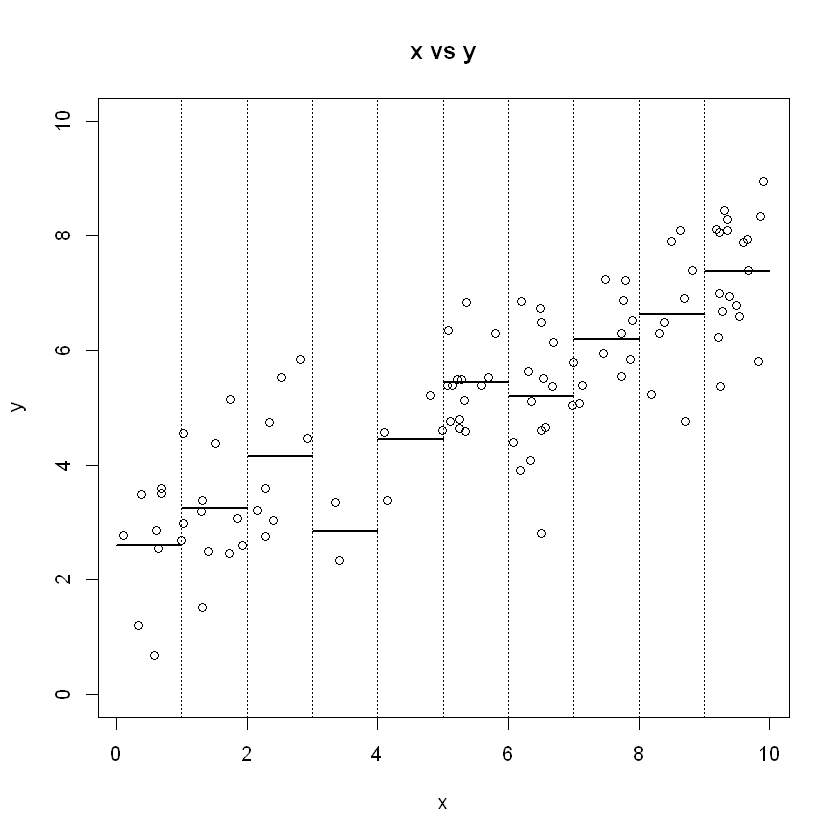

In [121]:
plot(x, y, ylim = c(0, 10), main = "x vs y" )
segments(0:9, y_local$x, 1:10, y_local$x, lwd = 2) ## segments 함수는 x좌표와 y좌표를 입력받아 line을 그려줌
abline(v = 1:9, lty = "dotted") ## abline 함수는 line을 그려줌, v는 수직선의 위치

`-` 참고: [abline 함수](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/abline)

`-` 참고: [segments 함수](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/segments)

# 입출력(input and output)

`-` `read.table\read.csv('파일 위치')` ---> 텍스트 파일 or csv 파일을 읽어 내부 저장소에 dataframe으로 만듦

`-` `getwd()` ---> 현재의 작업 디렉토리를 알려줌

`-` `setwd('위치')` ---> 작업 디렉토리를 입력한 위치로 변경

`-` `dir()` ---> 현재 작업 디렉토리에 있는 파일들의 리스트를 보여줌

`-` `write.table\write.csv()`은 특정 데이터 프레임을 작업 디렉토리에 텍스트 파일 or csv 파일로 입력함

`-` 파일을 읽을 때 `stringAdFactors = F` 옵션을 적용하면 문자열 변수가 자동으로 factor 형이 되는 것을 막아줌

`-` `sink()`함수를 통해 결과값을 텍스트 파일로 저장할 수 있음 ---> [sink function](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sink)

## scan 함수

`-` `scan()` ---> 비정형의 문자열 데이터를 읽을 때 유용

`-` what 은 읽어 들일 데이터 값 형식 numeric, logical, character

`-` 책 따라 하는데 scan함수가 제대로 작동되지 않아 찾아보니 quote = "" 로 하지 않아서라고 함 ---> 참고: [https://pythonq.com/so/r/29317](https://pythonq.com/so/r/29317)

`-` quote = "" 옵션을 적용하지 않으면 Read 1 item을 반환 ---> 빈칸을 기준으로 문자열을 쪼개지 않았다는 뜻 ---> 그런데 sep = "\n" 으로 하면 Read 20 item임

`-` 원인을 알았는데 내가 yesterday노래 가사 텍스트 파일을 만들 때 맨 앞에 " 기호를 실수로 추가했었음 ---> " 기호를 없애니 잘 동작함

In [98]:
lyrics <- scan("yesterday.txt", what = "character") ## quote = "" 옵션을 적용 안해도 잘 동작함

In [99]:
str(lyrics) 

 chr [1:126] "Yesterday," "all" "my" "troubles" "seemed" "so" "far" "away." ...


In [100]:
head(lyrics, 10)

[1] "Yesterday," "all"        "my"         "troubles"   "seemed"    
 [6] "so"         "far"        "away."      "Now"        "it"

`-` 빈칸을 구분자로 인식하여 문자열을 쪼개어 읽어옴 + 줄 단위로 읽고 싶다면 sep = "\n"

In [101]:
lyrics_2 <- scan("yesterday.txt", what = "character", sep = "\n")

In [102]:
str(lyrics_2)

 chr [1:20] "Yesterday, all my troubles seemed so far away." ...


In [103]:
head(lyrics_2, 5)

[1] "Yesterday, all my troubles seemed so far away."
[2] "Now it looks as though they're here to stay."  
[3] "oh, I believe in yesterday."                   
[4] "Suddenly, I'm not half the man I used to be."  
[5] "There's a shadow hanging over me."

## cat 함수

`-` print함수와 비슷하나 여러개의 출력이 가능하고 출력이 공백 없이 이어짐

In [122]:
print("a")
print("b")

[1] "a"
[1] "b"


In [123]:
cat("a")
cat("b")

ab

# 문자열 작업

## grep 함수

`-` `grep(pattern, x)`는 x에서 pattern이 있는 곳을 알려줌

In [124]:
grep("Yesterday", lyrics)

[1]   1  63 105

In [125]:
grep("yesterday", lyrics)

[1]  22  40  62  84 104 126

`-` "Yesterday"는 1 ,63 ,105번째 요소에 있고 "yesterday"는 22, 40 ,62, 84, 104, 126번째 요소에 있음을 알려줌

`-` 이번에는 "?"를 찾아보자

`-` grep("?", lyrics)를 하면 될 것 같지만 아님

In [127]:
#collapse-output

grep("?", lyrics)  

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126

`-` "?"는 정규표현식 기호로 사용되게 원래의 물음표 기호를 사용하고자 하면 "\\\\"을 앞에 넣어줘야함 ---> 나중에 정규표현식 공부하자

In [130]:
grep("\\?", lyrics)

[1] 47 89

## nchar 함수 

`-` `nchar(x)`는 문자열 x의 길이를 알려줌(빈칸 포함)

In [131]:
nchar("yesterday")

[1] 9

`-` 참고 : `length(x)`의 결과는 아래와 같음

In [142]:
length("yesterday")

[1] 1

`-` 문자열 벡터에도 적용 가능함

In [132]:
nchar(lyrics)

[1] 10  3  2  8  6  2  3  5  3  2  5  2  6  7  4  2  5  3  1  7  2 10  9  3  3
 [26]  4  3  3  1  4  2  3  7  1  6  7  4  3  3  9  4  9  3  3  3  2  3  1  5  5
 [51]  3  8  4  1  4  9  6  3  1  4  3 10  9  4  3  4  2  4  4  2  5  3  1  4  1
 [76]  5  2  4  5  3  1  7  2 10  3  3  3  2  3  1  5  5  3  8  4  1  4  9  6  3
[101]  1  4  3 10  9  4  3  4  2  4  4  2  5  3  1  4  1  5  2  4  5  3  1  7  2
[126] 12

## paste 함수

`-` 다수의 문자열을 붙여 하나의 문자열을 만듦

`-` 파이썬의 `join` 함수를 생각하면 된다

In [133]:
paste("a", "b", "c")

[1] "a b c"

In [135]:
paste("a", "b", "c", sep = "-")

[1] "a-b-c"

`-` `paste` 함수는 디폴트로 빈칸 하나를 기준으로 문자열을 붙인다

`-` `paste0` 함수를 사용하면 빈칸 없음을 기준으로 문자열을 붙일 수 있다

In [137]:
paste0("a", "b", "c")

[1] "abc"

## substr 함수

`-` `substr(x, start, stop)`은 x에서 start부터 stop까지의 문자열을 뽑아낸다

In [138]:
substr("abcdefg", 2, 4)

[1] "bcd"

## strsplit 함수

`-` `strsplit(x, split)`은 x를 split을 기준으로 분리한다

`-` 파이썬의 `split` 함수를 생각하면 쉽다

In [149]:
strsplit("a-b-c-d-e", "-")

[[1]]
[1] "a" "b" "c" "d" "e"

In [150]:
class(strsplit("a-b-c-d-e", "-")) ## 쪼갠 문자열들의 타입은 list이다

[1] "list"

In [151]:
unlist(strsplit("a-b-c-d-e", "-"))

[1] "a" "b" "c" "d" "e"

In [154]:
strsplit(c("a-b-c-d-e", "qq-bb"), "-") ## 문자열 벡터도 가능

[[1]]
[1] "a" "b" "c" "d" "e"

[[2]]
[1] "qq" "bb"

## gregexpr 함수(global regular expression)

`-` `gregexpr(pattern, x)`은 x에서 pattern이 발견되는 `모든` 위치를 알려준다

`-` 파이썬의 `index` 함수를 생각하면 쉽다

In [167]:
unlist(gregexpr("-", "2021-12-22"))

[1] 5 8

`-` `grep` 함수와의 차이점은 아래와 같음

In [165]:
unlist(grep("-", "2021-12-22"))

[1] 1

`-` grep 함수에서는 "2021-12-22"를 하나 취급한다

`-` 마치 `length("2021-12-22")`는 $1$인것처럼

`-` 포함여부만 확인 가능하고 문자열의 어느 위치에 존재하는지는 확인 불가능함

In [171]:
unlist(gregexpr("-", c("2021-12-22", "12-22"))) 
## 첫 번째 문자열에선 5, 8위치에 "-"이 존재하고
## 두 번째 문자열에선 3 위치에 "-" 존재한다

[1] 5 8 3

In [172]:
unlist(grep("-", c("2021-12-22", "12-22")))
## 첫 번째 문자열에 "-"이 존재하고
## 두 번째 문자열에 "-"이 존재한다
## 문자열 어느 위치에 "-"이 존재하는지는 알 수 없다

[1] 1 2

`-` `regexpr` 함수(regular expression)도 있는데 이 함수는 `처음` 위치만 알려준다

In [174]:
unlist(regexpr("-", "2021-12-22"))
## 8번째 인덱스에도 "-"이 존재하지만 처음 "-"이 등장한 위치만 알려준다

[1] 5
attr(,"match.length")
[1] 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

## gsub 함수 (global substitude)

`-` `gsub(pattern, replace, x)`은 x에 있는 pattern을 replace로 바꾼다

`-` 파이썬의 `replace` 함수를 떠올리면 쉽다

In [175]:
gsub("-", ".", "2021-12-22")

[1] "2021.12.22"